## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 68 (delta 24), reused 27 (delta 12), pack-reused 23 (from 1)
Receiving objects: 100% (68/68), 13.58 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [2]:
# Importing relavant packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.metrics import mean_squared_error

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
# 1.
path = './knn/data/USA_cars_datasets.csv' # Pulling the cars data
df = pd.read_csv(path, low_memory=False) # Creating an cars dataframe

In [4]:
# Removing all but the price, year, and mileage variables:
df = df[['price', 'year', 'mileage']]

# Checking for any NANs in the df (there are none):
print(df.isna().sum(), '\n')

# Checking any null values in the df (there are none):
print(df.isnull().sum(), '\n')

# Seeing the dimensions of the dataframe (2499 x 3):
print(df.shape)

price      0
year       0
mileage    0
dtype: int64 

price      0
year       0
mileage    0
dtype: int64 

(2499, 3)


In [5]:
# Taking a preliminary look at the data:
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [6]:
# 2.
# Max/min normalizing the year and mileage variables:
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
df['mileage'] = (df['mileage'] - df['mileage'].min()) / (df['mileage'].max() - df['mileage'].min())

In [7]:
# 3.
y = df['price'] # Creating atarget variable vector (what we're predicting)
X = df.loc[:,['year','mileage']] # Creating a feature matrix (predictors)

# Splitting the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

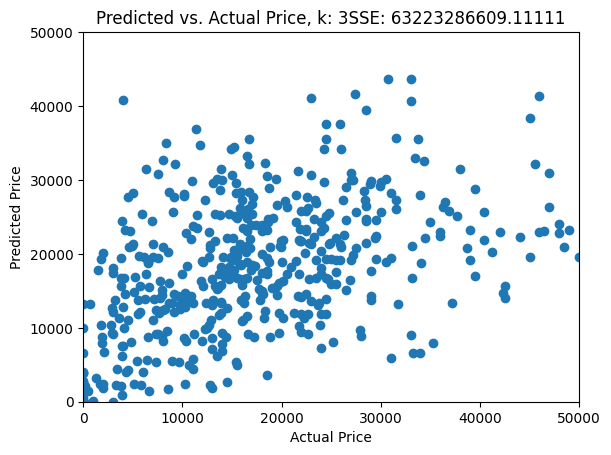

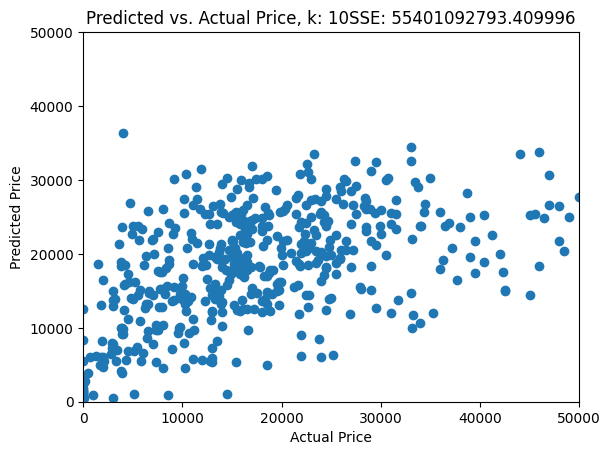

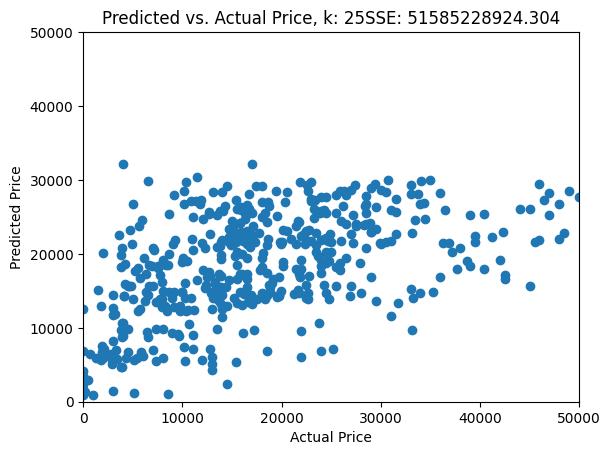

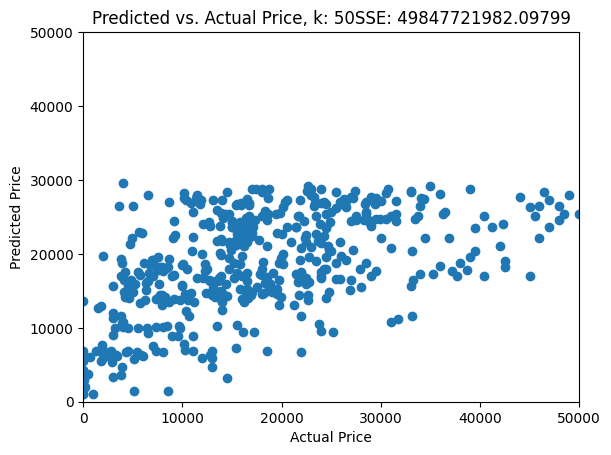

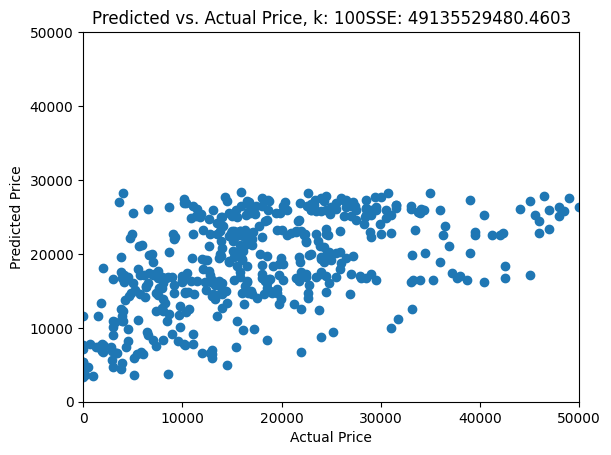

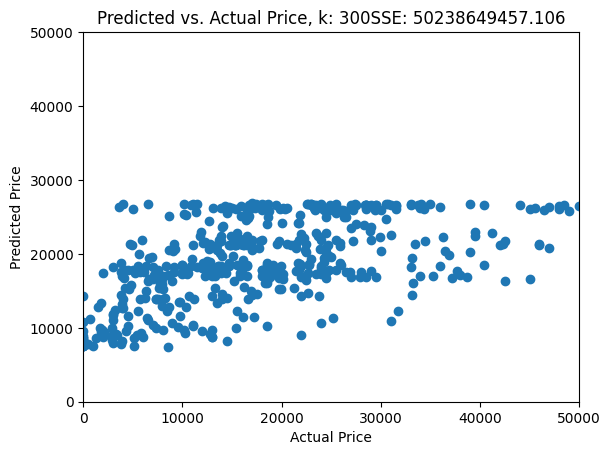

In [10]:
# 4.

k_values = [3, 10, 25, 50, 100, 300] # List of k's to try

for k in k_values:
  model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
  fitted_model = model.fit(X_train,y_train)  # Train the model on our data

  y_hat = fitted_model.predict(X_test)  # Predict values for test set
  SSE = np.sum( (y_test-y_hat)**2 )     # Save the computed SSE for test set

  fig, axes = plt.subplots()
  plt.scatter(y_test,y_hat)

  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title('Predicted vs. Actual Price, k: ' + str(k) + 'SSE: ' + str(SSE))
  plt.xlim(0,50000)
  plt.ylim(0,50000)
  plt.show()



In [11]:
# Over the course of the k-values the SSE decreases by about 15%.
#  The spread of the data also seems to decrease noticeably.

In [12]:
# 5.
k_bar = 200 # Number of k's to try
SSE = np.zeros(k_bar) # We'll store the SSE here

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data

    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE for test set

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[77]


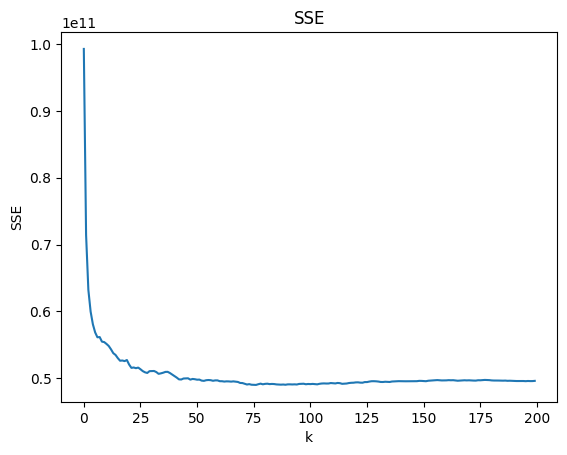

In [14]:
# Plotting the k-values:

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

In [ ]:
# The optimal k-value is 77

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.